# Step 1 Import Libraries
Context:
- While printing a dataframe to avoid columns being missed out we can use "pd.set_option('display.max_columns', None)". This will display all the columns.

Hints:
1. Import functions for implementing apriori algorithm and calculating association_rules from mlxtend.frequent_patterns
2. Import relevant function for transaction encoding from mlxtend.preprocessing
3. Import relevant function for regular expressions

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from IPython.display import display
import regex as re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


# Step 2  Load dataset
Context:
- Read the data line by line instead of using pd.read_csv because the data doesn't have column headers, and the items are not separated properly with commas. Some items are combined in a single cell, separated by semicolons(column 1). 
- By opening and processing the data this way, we can carefully extract and structure the individual items from each line. It's a more flexible approach when dealing with irregular data like this.
- Create a list 'transactions' and append items to it by splitting the items from the data with the use of regex.
- Use regex to split the items whenever there is a comma or semicolon using [;,]

Hints:
1. Open the csv file as 'f' from its location using open method
2. Loop through every line in 'f'
3. Use split method of regex to split the items whenever there is a comma or semicolon
4. Use append method to add the items to the list 'transactions'.

In [3]:
transactions = []
with open('store_data.csv') as f:
    for line in f:
        transactions.append(re.split(r'[;,]', line.strip())[1:])

- Convert the list 'transactions' into a pandas DataFrame
- Each column represents the items bought during transactions hence name the columns item1,item2... and so on.
- Remove the first row as transaction starts from second row.

Hints:
1. Use DataFrame method to convert list to dataframe
2. Give the transactions list as input data to the dataframe method
3. Use drop method followed by reset_index method to drop the first row and reset index


In [4]:

df = pd.DataFrame(transactions, columns= ['item'+str(i) for i in range(1,21)])
df = df.drop(df.index[0]).reset_index(drop=True)
df.head()

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


# Step 3 Exploratory Data Analysis (EDA)
## Check for duplicate rows and drop them

Hints:
1. Use duplicated method followed by sum method
2. If you find duplicates you can remove them using drop_duplicates method


In [5]:
count_of_duplicate_rows = df.duplicated().sum()
print(count_of_duplicate_rows)


2325


In [6]:
df = df.drop_duplicates()

In [7]:
count_of_duplicate_rows_2 = df.duplicated().sum()
print(count_of_duplicate_rows_2)

0


## List of all items in the grocery store
- Concatenate all cells in the dataframe into a single series
- Extract unique item names from this series

Hints:
1. Use Series method to concatenate the dataframe into a single series
2. Use unique method on the series to get the unique items

In [8]:

all_items = pd.Series(df.values.ravel('K'))
unique_items = all_items.unique()


print("List of Unique Item Names:")
display(unique_items)

List of Unique Item Names:


array(['shrimp', 'burgers', 'chutney', 'turkey', 'mineral water',
       'low fat yogurt', 'whole wheat pasta', 'soup', 'frozen vegetables',
       'french fries', 'eggs', 'cookies', 'spaghetti', 'meatballs',
       'red wine', 'rice', 'parmesan cheese', 'ground beef',
       'sparkling water', 'herb & pepper', 'pickles', 'energy bar',
       'fresh tuna', 'escalope', 'avocado', 'tomato sauce',
       'clothes accessories', 'energy drink', 'chocolate',
       'grated cheese', 'yogurt cake', 'mint', 'asparagus', 'champagne',
       'ham', 'muffins', 'french wine', 'chicken', 'pasta', 'tomatoes',
       'pancakes', 'frozen smoothie', 'carrots', 'yams', 'shallot',
       'butter', 'light mayo', 'pepper', 'candy bars', 'cooking oil',
       'milk', 'green tea', 'bug spray', 'oil', 'olive oil', 'salmon',
       'cake', 'almonds', 'salt', 'strong cheese', 'hot dogs', 'pet food',
       'whole wheat rice', 'antioxydant juice', 'honey', 'sandwich',
       'salad', 'magazines', 'protein bar', '

## Transaction length distribution
Context:
- Transaction length refers to the number of items within a single transaction or invoice.
- Create a column 'Transaction_Length' by calculating the count of items in each row(each row reprents a invoice)
- Get the summary statistics of the created column 
- Plot a histogram to understand the distribution of 'Transaction_Length'
- Drop the Transaction_Length column after the analysis

Hints:
1. Use apply method to apply the row count to each row of the column 'Transaction_Length'
2. Use describe method on the column 'Transaction_Length' to get summary statistics



In [9]:

df['Transaction_Length'] = df.apply(lambda row: row.count(), axis=1)
df['Transaction_Length']


0       20
1        3
2        1
3        2
4        5
        ..
7493     7
7494    12
7496     3
7497     6
7500     4
Name: Transaction_Length, Length: 5176, dtype: int64

In [10]:

summary_stats = df['Transaction_Length'].describe()
print(summary_stats)

count    5176.000000
mean        5.074382
std         2.784650
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        20.000000
Name: Transaction_Length, dtype: float64


Hints(for plotting histogram):
1. Use the relevant function from seaborn to plot the histogram
2. Use the dataframe df as input data
3. Specify the column to plot on the x-axis (i.e) Transaction_Length
4. Pick a color for the histogram like 'skyblue'
5. Set the number of bins
6. Give the plot an appropriate title describing the data
7. Set the x and y axis labels to describe the data


Text(0, 0.5, 'Frequency')

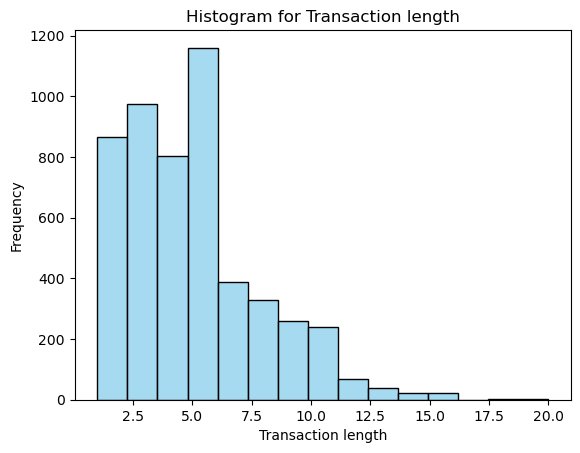

In [11]:


h = sns.histplot(df, x='Transaction_Length', color='skyblue', bins=15)
plt.title(f'Histogram for Transaction length')
plt.xlabel('Transaction length')
plt.ylabel('Frequency')

- Drop the column 'Transaction_Length' using drop method

In [12]:
df = df.drop(['Transaction_Length'], axis=1)

## Replace null values
- Each row represents the items bought in an invoice so the null rows do not indicate any missing data
- Hence do not delete the rows just replace with "NA"

Hints:
1. Use fillna method

In [13]:
df.fillna('NA', inplace=True)

## Step 4 Transaction Encoding
Context:
- Transaction encoding is an approach used in the context of association rule mining
- In transaction encoding, each row in a dataset represents a transaction, and the presence or absence of items in that transaction is encoded using binary values (usually 1 for present and 0 for absent).
- This encoding is used to represent transaction data in a format suitable for association rule mining algorithms like Apriori.

- Use a transaction encoder to encode item names
- Apply fit and transform using encoder to the dataframe

Hints:
1. Use TransactionEncoder method to declare the encoder object
2. Fit and transform the dataframe using fit method followed by transform method
3. Convert the encoded data to a dataframe using DataFrame method


In [14]:


encoder = TransactionEncoder()


encoded_data = encoder.fit(df.values).transform(df.values)

df_encoded = pd.DataFrame(encoded_data, columns=encoder.columns_)

df_encoded.head()



,asparagus,NA,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables,gluten free bar,grated cheese,green beans,green grapes,green tea,ground beef,gums,ham,hand protein bar,herb & pepper,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

- drop the 'NA' column as it is not an item and was just used to handle null values while encoding

In [15]:
df_encoded = df_encoded.drop(['NA'], axis=1)
df_encoded.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables,gluten free bar,grated cheese,green beans,green grapes,green tea,ground beef,gums,ham,hand protein bar,herb & pepper,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

## Step 5 Apriori algorithm
Context:
- Apriori algorithm is a classic data mining and machine learning algorithm used for association rule mining in transactional databases
- It relies on three metrics: support,confidence and lift
- It helps identify which items are frequently purchased together.

- Apply the Apriori algorithm to the encoded dataset to  identify itemsets that are frequently bought
- Items will fall under frequently bought category based on the threshold we define.
- In this case the minimum support threshold is 3%, which means we are interested in itemsets that occur in at least 3% of the transactions
- These frequent itemsets are crucial for deriving association rules.

Hints:
1. Use apriori method to find frequent itemsets.
2. Pass the transaction encoded dataframe as input data





In [16]:


frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)

print("Frequent Itemsets:")
display(frequent_itemsets)


Frequent Itemsets:


,support,itemsets
0,0.045981,(avocado)
1,0.045015,(brownies)
2,0.113794,(burgers)
3,0.041151,(butter)
4,0.103555,(cake)
...,...,...
88,0.085008,"(mineral water, spaghetti)"
89,0.034583,"(mineral water, tomatoes)"
90,0.032457,"(olive oil, spaghetti)"
91,0.036128,"(pancakes, spaghetti)"


# Step 6 Association rules
Context:
- Association rules reveal patterns and relationships between items in our transaction data.
- These rules indicate when certain items are likely to be purchased together
-  We have already obtained the frequent itemsets using the Apriori algorithm. Here we are generating association rules based on the frequent itemsets and using the "confidence" metric to assess the strength of these rules.
- The result will be a set of association rules that indicate relationships between items based on how often they appear together in transactions.

## Interpreting results
- Antecedents: This column lists the items that represents the "if" part of the rule.

- Consequents: This column lists the items that represents the "then" part of the rule.

- Antecedent Support: This is the support (frequency) of the antecedent itemset. It measures how often the antecedent appears in transactions.

- Consequent Support: This is the support of the consequent itemset. It measures how often the consequent appears in transactions.

- Support: This is the support of the whole rule (antecedent and consequent combined). It indicates how often the entire rule is satisfied in the dataset.

- Confidence: Confidence measures how often the rule is correct. It's the ratio of the support of the whole rule to the support of the antecedent. Higher confidence indicates a stronger relationship between the antecedent and consequent.

- Lift: Lift measures how much more likely the consequent is given the antecedent compared to if they were independent. A lift greater than 1 suggests a positive association, while a lift less than 1 suggests a negative association.

- Leverage: Leverage measures the difference between the observed frequency of the antecedent and consequent appearing together and what would be expected if they were independent. It helps identify items that appear together more often than expected.

- Conviction: Conviction measures the ratio of the expected frequency that the antecedent appears without the consequent if they were independent to the observed frequency. It is used to identify the degree to which the antecedent and consequent are dependent.

- Zhang's Metric: Zhang's metric is another measure of the dependency between antecedents and consequents in the rule.

- Antecedent Length: This column shows the number of items in the antecedent part of the rule.

## Hints:
1. Use association_rules method to generate the association rules
2. Pass the frequent itemsets as input

In [17]:

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(eggs),(burgers),0.208076,0.113794,0.036128,0.173630,1.525826,0.012450,1.072408,0.435164
1,(burgers),(eggs),0.113794,0.208076,0.036128,0.317487,1.525826,0.012450,1.160307,0.388868
2,(mineral water),(burgers),0.299845,0.113794,0.034583,0.115335,1.013539,0.000462,1.001741,0.019078
3,(burgers),(mineral water),0.113794,0.299845,0.034583,0.303905,1.013539,0.000462,1.005832,0.015073
4,(spaghetti),(burgers),0.229521,0.113794,0.030332,0.132155,1.161347,0.004214,1.021156,0.180318
...,...,...,...,...,...,...,...,...,...,...
83,(spaghetti),(olive oil),0.229521,0.087713,0.032457,0.141414,1.612246,0.012326,1.062547,0.492871
84,(pancakes),(spaghetti),0.125193,0.229521,0.036128,0.288580,1.257316,0.007394,1.083016,0.233943
85,(spaghetti),(pancakes),0.229521,0.125193,0.036128,0.157407,1.257316,0.007394,1.038232,0.265620
86,(spaghetti),(shrimp),0.229521,0.098918,0.030332,0.132155,1.336003,0.007629,1.038298,0.326419


## Step 7 Unique association rules
Context:
- When generating association rules, you might get results like (mineral water, eggs) and (eggs, mineral water). These rules essentially say the same thing: people tend to buy mineral water and eggs together. However, because the order of items is different, they're treated as separate rules.
- To tackle this create a set to store unique association rules
- Iterate through the association rules list and add only unique ones to set.

## Top 5 rules
- The task is to get top 5 association rules
- Sort the rules in descending order
- Loop through them and break the loop as soon as we get five unique rules
- The top associations must have confidence of atleast 25%.
- The top associations must have atleast 1% support.

Hints:
1. Use sort_vales method to sort the rules based on confidence
2. Use ascending=False to sort in descending order
3. Create a set 'unique_rules' using the set method
4. Loop through the rules and if a rule(i.e.) (antecedents, consequents) pair is not in the set 'unique_rules' then add it to the set using add method and add it to the list 'top_5_unique_rules' using append method
5. When we get 5 unique rules(i.e.) len(top_5_unique_rules) == 5 break the loop

In [18]:

rules = rules.sort_values(by="confidence", ascending=False)


unique_rules = set()


top_5_unique_rules = []

# Iterate through the association rules
for index, row in rules.iterrows():
    antecedents = frozenset(row['antecedents'])
    consequents = frozenset(row['consequents'])


    if (antecedents, consequents) not in unique_rules and (consequents, antecedents) not in unique_rules:
        unique_rules.add((antecedents, consequents))
        top_5_unique_rules.append((antecedents, consequents))


    if len(top_5_unique_rules) == 5:
        break

# Print the top 5 unique rules
print("Top 5 Unique Association Rules:")
for index, (antecedents, consequents) in enumerate(top_5_unique_rules):
    confidence = rules.iloc[index]['confidence']
    support = rules.iloc[index]['support']
    display(f"Rule {index + 1}:")
    display(f"Antecedents: {antecedents}")
    display(f"Consequents: {consequents}")
    display(f"Confidence: {confidence}")
    display(f"Support: {support}")
    print()


Top 5 Unique Association Rules:


'Rule 1:'

"Antecedents: frozenset({'soup'})"

"Consequents: frozenset({'mineral water'})"

'Confidence: 0.4713896457765668'

'Support: 0.033423493044822256'

'Rule 2:'

"Antecedents: frozenset({'olive oil'})"

"Consequents: frozenset({'mineral water'})"

'Confidence: 0.44052863436123346'

'Support: 0.03863987635239567'

'Rule 3:'

"Antecedents: frozenset({'ground beef'})"

"Consequents: frozenset({'mineral water'})"

'Confidence: 0.43243243243243246'

'Support: 0.05873261205564142'

'Rule 4:'

"Antecedents: frozenset({'ground beef'})"

"Consequents: frozenset({'spaghetti'})"

'Confidence: 0.411095305832148'

'Support: 0.05583462132921175'

'Rule 5:'

"Antecedents: frozenset({'milk'})"

"Consequents: frozenset({'mineral water'})"

'Confidence: 0.39886363636363636'

'Support: 0.06781298299845441'